<a target="_blank" href="https://colab.research.google.com/github/CompOmics/D012554A_2025/blob/main/notebooks/day_5/answers/5.2b_Exercises_Dimensionality_reduction_answers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 5.2 Exercises – Dimensionality Reduction (Answers)

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

np.random.seed(42)

---
## Exercise 1 – PCA on Breast Cancer data

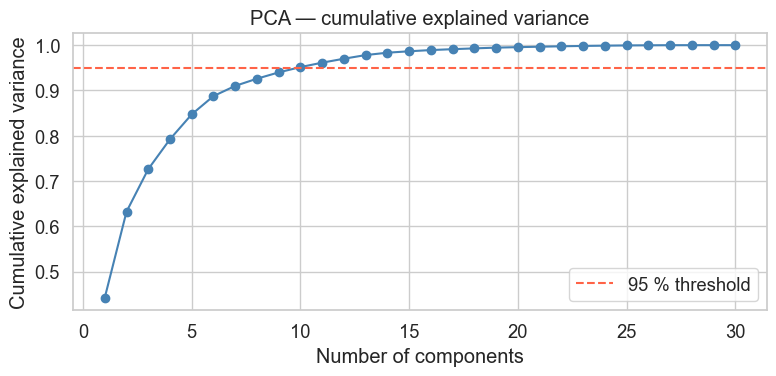

Components needed for 95% variance: 10


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_breast_cancer()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

pca_full = PCA()
pca_full.fit(X_scaled)

cumvar = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumvar) + 1), cumvar, marker="o", color="steelblue")
plt.axhline(0.95, color="tomato", linestyle="--", label="95 % threshold")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA — cumulative explained variance")
plt.legend()
plt.tight_layout()
plt.show()

n95 = np.searchsorted(cumvar, 0.95) + 1
print(f"Components needed for 95% variance: {n95}")

---
## Exercise 2 – 2-D PCA scatter plot

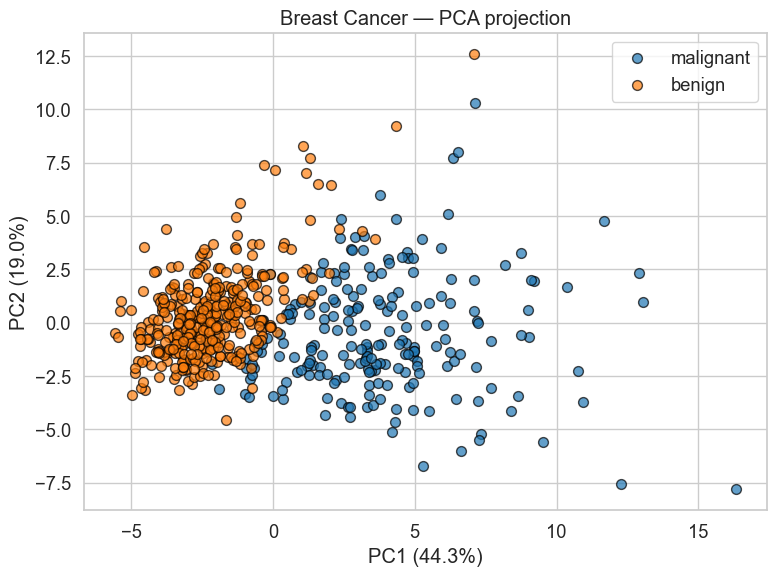

In [3]:
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for label, name in enumerate(data.target_names):
    mask = data.target == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=name,
                edgecolor="k", s=50, alpha=0.7)
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]:.1%})")
plt.title("Breast Cancer — PCA projection")
plt.legend()
plt.tight_layout()
plt.show()

---
## Exercise 3 – MDS visualisation

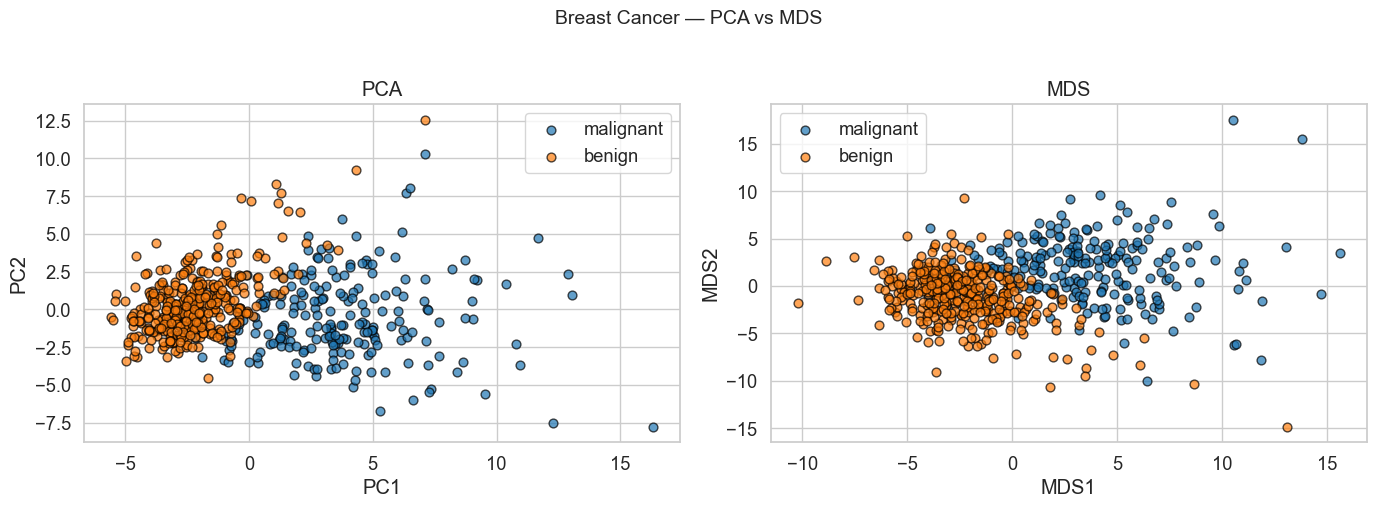

In [4]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

dist_matrix = squareform(pdist(X_scaled, metric='euclidean'))

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42,
          max_iter=1000, normalized_stress="auto")
X_mds = mds.fit_transform(dist_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for label, name in enumerate(data.target_names):
    mask = data.target == label
    ax1.scatter(X_2d[mask, 0], X_2d[mask, 1], label=name,
                edgecolor="k", s=40, alpha=0.7)
    ax2.scatter(X_mds[mask, 0], X_mds[mask, 1], label=name,
                edgecolor="k", s=40, alpha=0.7)

ax1.set_title("PCA")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.legend()

ax2.set_title("MDS")
ax2.set_xlabel("MDS1")
ax2.set_ylabel("MDS2")
ax2.legend()

fig.suptitle("Breast Cancer — PCA vs MDS", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()